# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas seaborn sklearn

In [36]:
# 전체 열 보기
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

---

---

# 1. 라이브러리 Import 및 데이터 불러오기

* sklearn 을 설치 하세요. 

* 관련 라이브러리들을 불러오세요

In [19]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv('train_x.csv', encoding='UTF-8')
train_y = pd.read_csv('train_y.csv', encoding='UTF-8')
test_x = pd.read_csv('test_x.csv', encoding='UTF-8')
test_y = pd.read_csv('test_y.csv', encoding='UTF-8')

In [79]:
# 학습/평가 데이터 로딩
train_x_1 = pd.read_csv('train_x2.csv', encoding='UTF-8')
train_y_1 = pd.read_csv('train_y2.csv', encoding='UTF-8')
test_x_1 = pd.read_csv('test_x2.csv', encoding='UTF-8')
test_y_1 = pd.read_csv('test_y2.csv', encoding='UTF-8')

#### [실습문제1] 라이브러리 불러오기



In [23]:
# 아래에 실습코드를 작성하세요.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *


In [66]:
def perf_check(pred, test_y):
    print('RMSE :', round(mean_squared_error(pred, test_y, squared=False), 5))
    print('R-squared Score: ', round(mean_squared_error(pred, test_y), 5))
    print('MAE : ', round(mean_absolute_error(pred, test_y), 5))
    print('MAPE: ', round(mean_absolute_percentage_error(pred, test_y), 5))
    print('1-MAPE: ', round(1-mean_absolute_percentage_error(pred, test_y), 5))
    print('R2-Score: ', round(r2_score(pred, test_y), 5))

In [44]:
col = ['time', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)',
       '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

train_x2 = train_x[col]
test_x2 = test_x[col]

---

# 2. Modeling
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제2] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [20]:
train_y 

,aft1h_PM10
0,24.0
1,24.0
2,25.0
3,27.0
4,23.0
...,...
8754,24.0
8755,25.0
8756,26.0
8757,27.0


In [12]:
train_x1 = train_x.iloc[:, 1:]

In [22]:
# 아래에 실습코드를 작성하세요.
lr = LinearRegression()
lr.fit(train_x1, train_y)

LinearRegression()

In [67]:
# Test 데이터로 성능을 평가해보세요.
pred_lr = lr.predict(test_x.iloc[:, 1:])
perf_check(pred_lr, test_y)

RMSE : 6.56328
R-squared Score:  43.07659
MAE :  4.14914
MAPE:  0.11751
1-MAPE:  0.88249
R2-Score:  0.91648


In [56]:
print(r2_score(pred_lr, test_y))

0.9164773277054692


In [26]:
# 학습한 모델을 파일로 저장해보세요.
import pickle 
with open('model1_lr.pickle','wb') as fw:
    pickle.dump(lr, fw)

In [ ]:
# 현상기호 빼고

In [68]:
lr2 = LinearRegression()
lr2.fit(train_x2.iloc[:, 1:], train_y)

pred_lr2 = lr2.predict(test_x2.iloc[:, 1:])
perf_check(pred_lr2, test_y)

RMSE : 6.56312
R-squared Score:  43.0745
MAE :  4.14875
MAPE:  0.11752
1-MAPE:  0.88248
R2-Score:  0.91648


In [58]:
# 학습한 모델을 파일로 저장해보세요.
import pickle 
with open('model3_lr.pickle','wb') as fw:
    pickle.dump(lr2, fw)

In [55]:
print(r2_score(pred_lr2, test_y))

0.9164818585229035


In [ ]:
# 데이터 다 KNN 으로 보간

In [80]:
lr3 = LinearRegression()
lr3.fit(train_x_1.iloc[:, 1:], train_y)

pred_lr3 = lr3.predict(test_x_1.iloc[:, 1:])
perf_check(pred_lr3, test_y)

RMSE : 6.54236
R-squared Score:  42.80254
MAE :  4.10572
MAPE:  0.11626
1-MAPE:  0.88374
R2-Score:  0.91647


In [81]:
# 학습한 모델을 파일로 저장해보세요.
import pickle 
with open('model3_lr.pickle','wb') as fw:
    pickle.dump(lr2, fw)

In [82]:
print(r2_score(pred_lr3, test_y))

0.9164672145581777


### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언브스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제3] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [37]:
# 아래에 실습코드를 작성하세요.
params = {'max_depth' : range(2, 11), 'n_estimators' : range(10, 101, 10)}
rf = RandomForestRegressor()
model_rf = GridSearchCV(rf, params, cv=5, verbose=3)
model_rf.fit(train_x1, train_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 2/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 3/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 4/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 5/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 1/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 2/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 3/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 4/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 5/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 1/5] END ...................max_depth=2, n_estimators=30; total time=   0.3s
[CV 2/5] END ...................max_depth=2, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 11),
                         'n_estimators': range(10, 101, 10)},
             verbose=3)

In [72]:
# Test 데이터로 성능을 평가해보세요.
pred_rf = model_rf.predict(test_x.iloc[:, 1:])
perf_check(pred_rf, test_y)

RMSE : 6.72742
R-squared Score:  45.2582
MAE :  4.24917
MAPE:  0.12284
1-MAPE:  0.87716
R2-Score:  0.91333


In [47]:
# 학습한 모델을 파일로 저장해보세요.
with open('model2_rf.pickle','wb') as fw:
    pickle.dump(model_rf, fw)

In [57]:
print(r2_score(pred_rf, test_y))

0.9133310855821108


In [70]:
model_rf.best_score_

0.8280485039965525

In [71]:
# 아래에 실습코드를 작성하세요.
params = {'max_depth' : range(2, 11), 'n_estimators' : range(10, 101, 10)}
rf2 = RandomForestRegressor()
model_rf2 = GridSearchCV(rf2, params, cv=5, verbose=3)
model_rf2.fit(train_x2.iloc[:, 1:], train_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 2/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 3/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 4/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 5/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 1/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 2/5] END ...................max_depth=2, n_estimators=20; total time=   0.3s
[CV 3/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 4/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 5/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 1/5] END ...................max_depth=2, n_estimators=30; total time=   0.4s
[CV 2/5] END ...................max_depth=2, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 11),
                         'n_estimators': range(10, 101, 10)},
             verbose=3)

In [83]:
# Test 데이터로 성능을 평가해보세요.
pred_rf = model_rf.predict(test_x.iloc[:, 1:])
perf_check(pred_rf, test_y)

RMSE : 6.72742
R-squared Score:  45.2582
MAE :  4.24917
MAPE:  0.12284
1-MAPE:  0.87716
R2-Score:  0.91333


In [47]:
# 학습한 모델을 파일로 저장해보세요.
with open('model2_rf.pickle','wb') as fw:
    pickle.dump(model_rf, fw)

In [84]:
print(r2_score(pred_rf, test_y))

0.9133310855821108


In [85]:
model_rf2 = GridSearchCV(rf2, params, cv=5, verbose=3)
model_rf2.fit(train_x_1.iloc[:, 1:], train_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 2/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 3/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 4/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 5/5] END ...................max_depth=2, n_estimators=10; total time=   0.1s
[CV 1/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 2/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 3/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 4/5] END ...................max_depth=2, n_estimators=20; total time=   0.3s
[CV 5/5] END ...................max_depth=2, n_estimators=20; total time=   0.2s
[CV 1/5] END ...................max_depth=2, n_estimators=30; total time=   0.4s
[CV 2/5] END ...................max_depth=2, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 11),
                         'n_estimators': range(10, 101, 10)},
             verbose=3)

In [87]:
model_rf2.best_estimator_, model_rf2.best_score_

(RandomForestRegressor(max_depth=6, n_estimators=30), 0.8247395217043649)

In [92]:
pred_rf2 = model_rf2.predict(test_x_1.iloc[:, 1:])
perf_check(pred_rf2, test_y)

RMSE : 6.75364
R-squared Score:  45.6117
MAE :  4.13827
MAPE:  0.11789
1-MAPE:  0.88211
R2-Score:  0.91602


#### [실습문제4] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

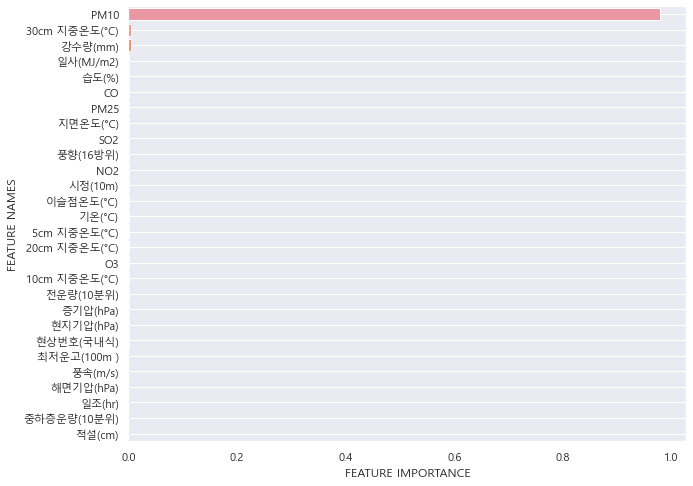

In [54]:
# Feature의 중요도 확인
result = plot_feature_importance(model_rf.best_estimator_.feature_importances_, train_x1.columns)

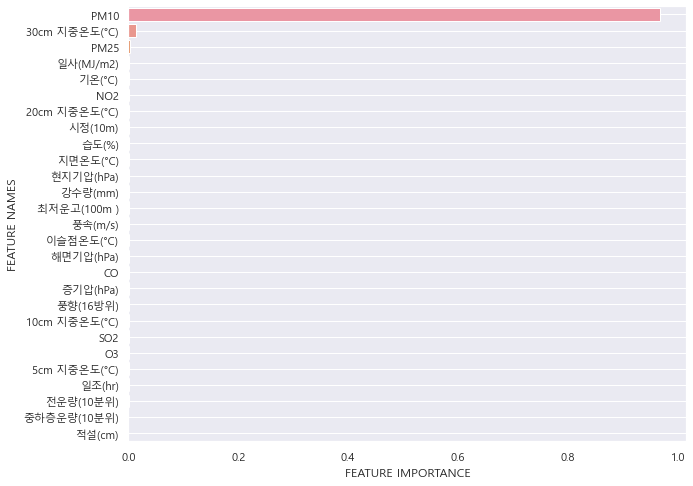

In [90]:
# Feature의 중요도 확인
result = plot_feature_importance(model_rf2.best_estimator_.feature_importances_, train_x_1.iloc[:, 1:].columns)

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제5] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [ ]:
# 아래에 실습코드를 작성하세요.





In [ ]:
# Test 데이터로 성능을 평가해보세요.





In [ ]:
# 학습한 모델을 파일로 저장해보세요.





#### [실습문제6] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인





In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제7] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [93]:
# 아래에 실습코드를 작성하세요.
from xgboost import XGBRegressor
params = {'max_depth' : range(1, 11), 'n_estimators' : range(10, 201, 10), 'learning_rate' : [0.01, 0.02, 0.03, 0.1, 0.2]}
xgb = XGBRegressor()
model_xgb = GridSearchCV(xgb, params, cv=5, verbose=3)
model_xgb.fit(train_x_1.iloc[:, 1:], train_y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=30; total time=   0.0s
[CV 2/5] END learning_rate=0.01, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...x_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                

In [94]:
# Test 데이터로 성능을 평가해보세요.
pred_xgb = model_xgb.predict(test_x_1.iloc[:, 1:])
perf_check(pred_xgb, test_y)

RMSE : 6.72243
R-squared Score:  45.19109
MAE :  4.21552
MAPE:  0.11848
1-MAPE:  0.88152
R2-Score:  0.9116


In [ ]:
# 학습한 모델을 파일로 저장해보세요.





#### [실습문제8] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인





In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.